In [ ]:
# EXPERIMENTO BOOTSTRAP

In [2]:
library(bnlearn)
library(Rgraphviz)
library(ggplot2)

In [3]:
bootstrap <- function(archivo, predictandos, algoritmos, R=500){
  data<-data.frame(lapply(read.csv(archivo, colClasses = "character"), function(x) if (is.character(x)) as.factor(x) else x))
  # Sacamos la variable ID
  data<-data[ , !names(data) %in% "ID"]

  resultados<-list()
  # Se itera sobre los predictandos
  for (predictando in predictandos){
    top_vars <- setdiff(names(data), predictandos)
    subset_data <- na.omit(data[, c(top_vars, predictando), drop = FALSE])
    # Función de puntaje que calcula el log-likelihood
    argscore <- function(bn, data) logLik(bn, data = data)
    
    puntajes<-list()
    tiempos<-list()
    # Se itera sobre una lista de algoritmos y se realiza el bootstrap calculando los puntajes y los tiempos empleados
    for (algo in algoritmos){
      inicio <- Sys.time()
      bootstrap_resultados<-bn.boot(data = subset_data,
                                      statistic = argscore,
                                      statistic.args = list(data = subset_data),
                                      R = R,
                                      m = nrow(subset_data),
                                      algorithm = algo)
      fin <- Sys.time()
      puntajes[[algo]] <- unlist(bootstrap_resultados)
      tiempos[[algo]] <- fin - inicio
    }
    # df de resultados
    df_puntajes <- data.frame(
      puntaje = unlist(puntajes),
      algoritmo = rep(names(puntajes), each = R)
    )
    df_tiempos <- data.frame(
      algoritmo = names(tiempos),
      tiempo = unlist(tiempos)
    )
    resultados[[paste0("puntajes_", tolower(predictando))]]<-df_puntajes
    resultados[[paste0("tiempos_", tolower(predictando))]]<-df_tiempos
    
    # Gráficos
    print(ggplot(df_puntajes, aes(x = algoritmo, y = puntaje, fill = algoritmo))+geom_boxplot()+labs(title = paste(predictando, "logLik"), x = "Algoritmo", y = "logLik")+theme_minimal())
    print(ggplot(df_tiempos, aes(x = algoritmo, y = tiempo, fill = algoritmo))+geom_bar(stat = "identity")+labs(title = paste("tiempo", predictando), x = "Algoritmo", y = "segundos")+theme_minimal())
  }
  return(resultados)
}

Warning message in check.data(x, allow.missing = TRUE):
"variable MH_AnoACTPprevia in the data has levels that are not observed in the data."
Warning message in check.data(x, allow.missing = TRUE):
"variable MH_AnoQXcoronariapre in the data has levels that are not observed in the data."
Warning message in check.data(x, allow.missing = TRUE):
"variable MH_AnoQXcoronariapre in the data has levels that are not observed in the data."
Warning message in check.data(x, allow.missing = TRUE):
"variable MH_AnoQXcoronariapre in the data has levels that are not observed in the data."
Warning message in check.data(x, allow.missing = TRUE):
"variable MH_IMC in the data has levels that are not observed in the data."
Warning message in check.data(x, allow.missing = TRUE):
"variable MH_AnoQXcoronariapre in the data has levels that are not observed in the data."
Warning message in check.data(x, allow.missing = TRUE):
"variable MH_AnoQXcoronariapre in the data has levels that are not observed in the dat

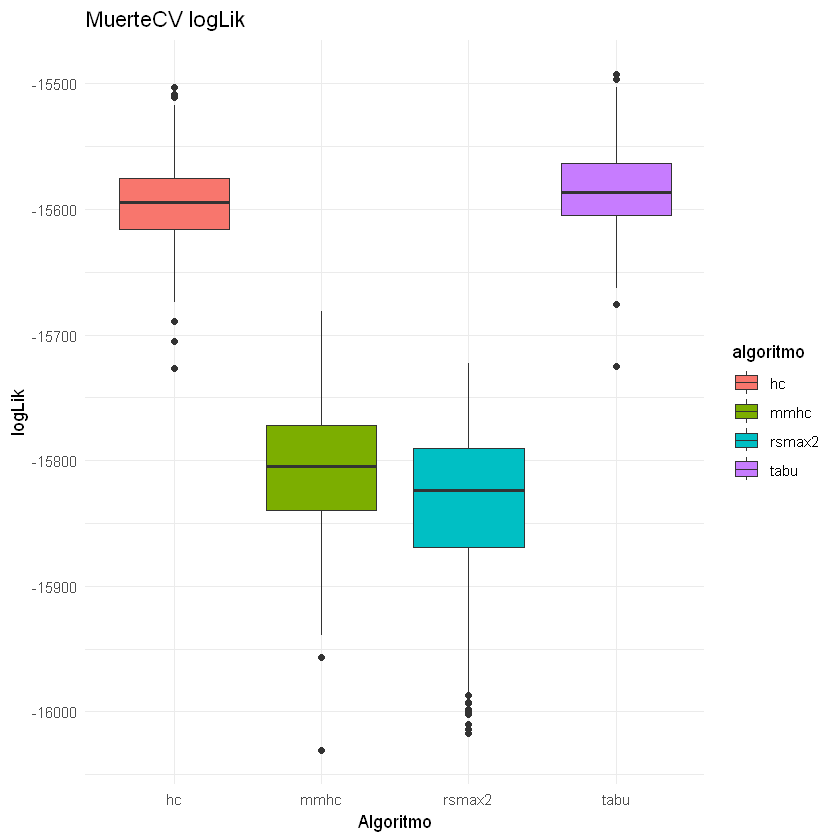

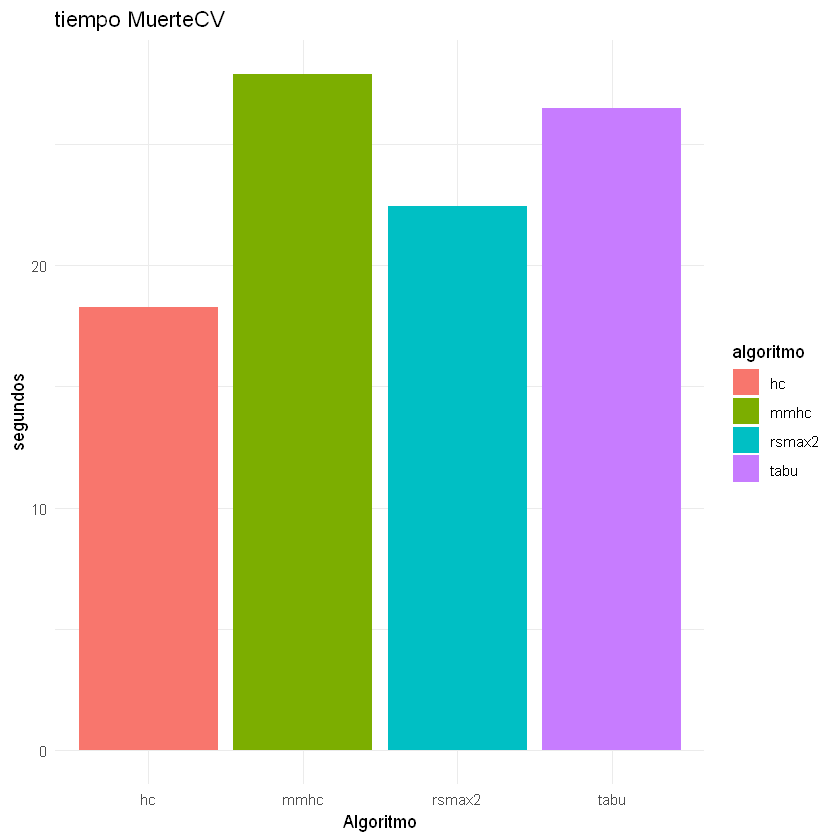

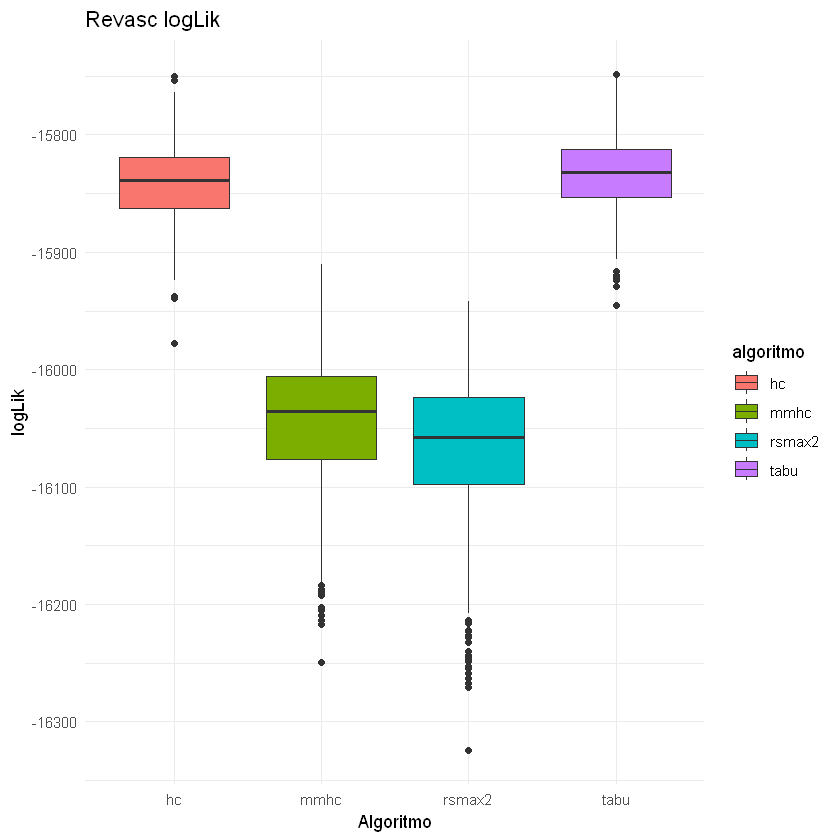

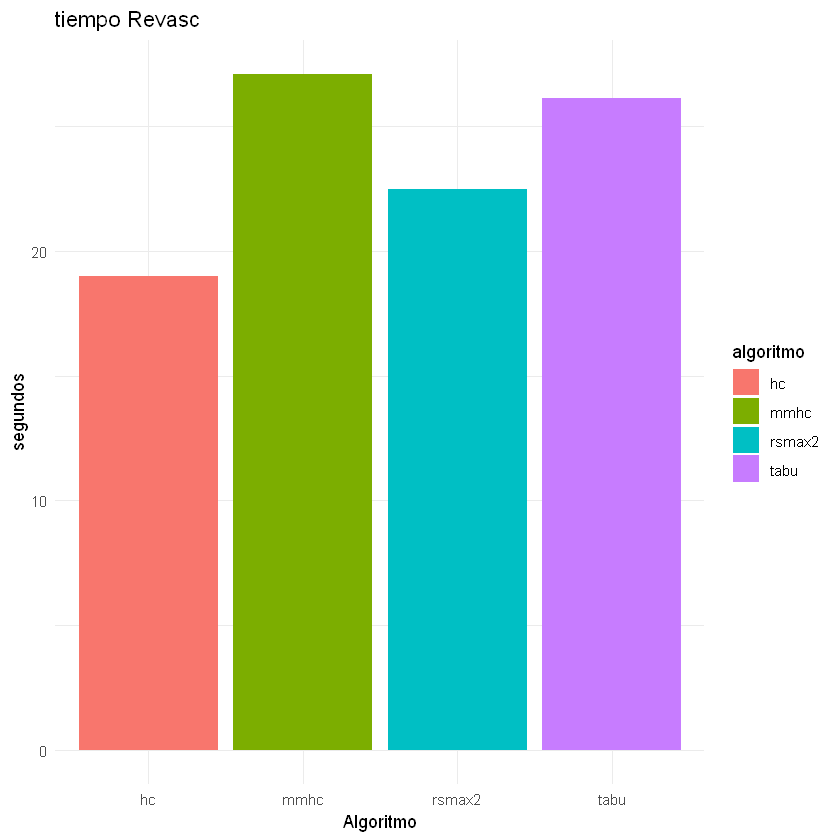

In [4]:
archivocsv <- "medicalhistory_nonulls.csv"
predictandos <- c("MuerteCV", "Revasc")
algoritmos <- c("hc", "tabu", "mmhc", "rsmax2")
resultados <- bootstrap(archivocsv, predictandos, algoritmos)

In [5]:
# Resultados para MuerteCV
df_muertecvpuntajes <- resultados$puntajes_muertecv
df_muertecvtiempos <- resultados$tiempos_muertecv
print(df_muertecvpuntajes)
print(df_muertecvtiempos)

            puntaje algoritmo
hc1       -15547.33        hc
hc2       -15582.47        hc
hc3       -15630.16        hc
hc4       -15558.13        hc
hc5       -15588.54        hc
hc6       -15605.81        hc
hc7       -15595.52        hc
hc8       -15630.55        hc
hc9       -15560.46        hc
hc10      -15582.84        hc
hc11      -15581.16        hc
hc12      -15579.52        hc
hc13      -15639.60        hc
hc14      -15653.46        hc
hc15      -15608.98        hc
hc16      -15596.20        hc
hc17      -15583.54        hc
hc18      -15582.46        hc
hc19      -15574.09        hc
hc20      -15575.31        hc
hc21      -15602.35        hc
hc22      -15643.87        hc
hc23      -15528.97        hc
hc24      -15673.42        hc
hc25      -15604.97        hc
hc26      -15582.65        hc
hc27      -15590.04        hc
hc28      -15667.42        hc
hc29      -15586.71        hc
hc30      -15558.61        hc
hc31      -15620.62        hc
hc32      -15598.83        hc
hc33      

In [6]:
# para Revasc
df_revascpuntajes <- resultados$puntajes_revasc
df_revasctiempos <- resultados$tiempos_revasc
print(df_revascpuntajes)
print(df_revasctiempos)

            puntaje algoritmo
hc1       -15847.58        hc
hc2       -15816.68        hc
hc3       -15786.67        hc
hc4       -15846.96        hc
hc5       -15875.32        hc
hc6       -15873.75        hc
hc7       -15858.74        hc
hc8       -15858.01        hc
hc9       -15763.96        hc
hc10      -15811.28        hc
hc11      -15820.45        hc
hc12      -15854.50        hc
hc13      -15809.07        hc
hc14      -15896.25        hc
hc15      -15820.75        hc
hc16      -15896.30        hc
hc17      -15852.29        hc
hc18      -15848.10        hc
hc19      -15863.55        hc
hc20      -15832.69        hc
hc21      -15839.79        hc
hc22      -15900.59        hc
hc23      -15828.36        hc
hc24      -15839.53        hc
hc25      -15843.83        hc
hc26      -15870.17        hc
hc27      -15836.51        hc
hc28      -15831.24        hc
hc29      -15835.96        hc
hc30      -15851.07        hc
hc31      -15850.42        hc
hc32      -15860.04        hc
hc33      